<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions


NB: extended from the base version to further explain back propogation

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [2]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

# how many features are there?
# how many observations are there?

In [3]:
#new set of data
X = np.random.binomial(1, 0.7, (100, 2)) # values
y = np.random.binomial(1, 0.5, (X.shape[0], 1)) # target

input_layer_size = X.shape[1] # i.e. how many features are there?
hidden_layer_1_size = 5

## Functions

In [4]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return max(0.0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [5]:
# Setting training iterations
epoch = 100  #one epoch represents forward and back propagation of all the data once
# Setting learning rate 
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1] 
# number of hidden layers neurons
hidden_layer_1_size = 3 #3 neurons in the hidden layer 
# number of neurons at output layer
output_layer_size = 1 #label

### Weights and Bias

In [6]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size)) # 7 features by 3 nodes, 1 weight for each
bh1 = np.random.uniform(size = (1, hidden_layer_1_size)) # 1 bias term for each node, total of 3 weights
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size)) # 3 features from previous node, 1 output node
bout = np.random.uniform(size = (1, output_layer_size)) # 1 bias term

# Step Through a Batch

In [7]:
cost = []
# Forward Propagation
print('Here is our target for observation 1: ',y[0])
print('Here are our features for observation 1: ',X[0])
print('Here are our initial weights for input to hidden layer 1: \n',wh1)
print('Here are all the inputs to node 1 of hidden layer 1: ',wh1[:,0])

calc = np.dot(X[0], wh1)
print('Here is the output of the first hidden layer for the first sample: ',calc)

# do the nodes "fire"?

Here is our target for observation 1:  [0]
Here are our features for observation 1:  [1 1]
Here are our initial weights for input to hidden layer 1: 
 [[0.51854868 0.64525547 0.07497496]
 [0.91011705 0.88022007 0.70574289]]
Here are all the inputs to node 1 of hidden layer 1:  [0.51854868 0.91011705]
Here is the output of the first hidden layer for the first sample:  [1.42866572 1.52547554 0.78071785]


In [8]:
for i, val in enumerate(range(wh1.shape[1])):
    print('For node {} in hidden layer 1....'.format(i+1))
    node_h1_1 = sigmoid(calc[i]+bh1[0][i])
    print('Sigmoid: ',node_h1_1)
    
    node_h1_1 = relu(calc[i]+bh1[0][i])
    print('Relu: ',node_h1_1)
    
    # get the sigmoid activiation function result for sample 0
    hidden_layer_1_activation = sigmoid(calc+bh1) # weight * feature + bias

For node 1 in hidden layer 1....
Sigmoid:  0.9088884848657961
Relu:  2.3001382104242425
For node 2 in hidden layer 1....
Sigmoid:  0.8635369412341596
Relu:  1.8449827312415832
For node 3 in hidden layer 1....
Sigmoid:  0.7075908157294714
Relu:  0.8837118453985796


In [9]:
# next, output layer
output_layer = np.dot(hidden_layer_1_activation, wout)
output_layer = output_layer + bout
output = sigmoid(output_layer)

loss =  y[0]-output[0][0]
print('Loss: {}'.format(loss))
print('Predicted class: {}'.format(round(output[0][0],0)))


Loss: [-0.67240512]
Predicted class: 1.0


# Back propogate loss

Before we do this, lets consider some options for evaluating our weights and deciding how to improve them.

1. Randomly adjust the weights by a small amount a measure progress. Reverse direction of the loss gets worse
We might eventually hit upon a decent set of weights but we are just as likely to endlessly search for optimaly weights.

1. Adjust the weights a little in both directions. Move in the direction that results in the lowest error
We have at least two problems here. First, it requires doing two calculations for every weight, then make a prediction on change 1 (negative) then again on change 2 (positive) then deciding which way to go. Second, what if the best direction is a COMBINATION where some weights increase and some decrease?

2. Take the derivative of  

In [10]:
# use this example: https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

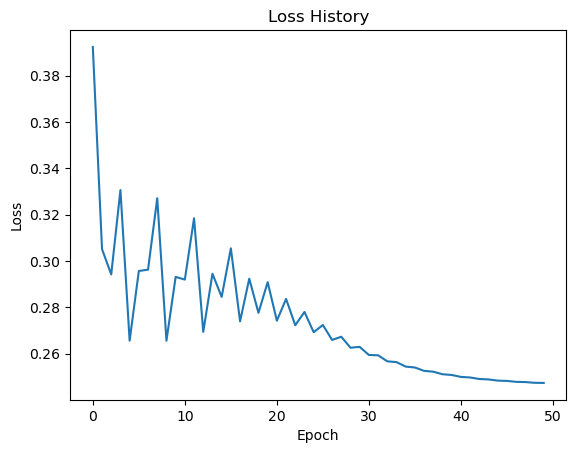

In [17]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define the neural network
class NeuralNetwork:
    def __init__(self):
        # Define the network architecture
        self.input_size = 2
        self.hidden_size = 3
        self.output_size = 1

        # Initialize the weights and biases randomly
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.random.randn(self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.random.randn(self.output_size)

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2)

    def backward(self, X, y):
        # Backward pass
        self.loss = np.mean((self.output - y) ** 2)

        # Calculate gradients
        delta2 = 2 * (self.output - y) * sigmoid_derivative(self.z2) # derivative of the output
        dW2 = np.dot(self.a1.T, delta2) 
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, self.W2.T) * sigmoid_derivative(self.z1) # derivative of the hidden layer
        dW1 = np.dot(X.T, delta1)  # derivative of the hidden layer
        db1 = np.sum(delta1, axis=0)

        # Update weights and biases
        learning_rate = 0.1
        self.W2 -= learning_rate * dW2 # "-=" in place subtraction like "+="
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, num_epochs):
        loss_history = []

        for epoch in range(num_epochs):
            self.forward(X)
            self.backward(X, y)
            loss_history.append(self.loss)

        return loss_history

# Create an instance of the neural network
nn = NeuralNetwork()

# Train the neural network
num_epochs = 50
loss_history = nn.train(X, y, num_epochs)

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

# Mnist example

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.metrics import AUC
from keras.losses import categorical_crossentropy # Common for multi class problems (vs multi label). 
                                                # Compares actual distribution over classes to predicted distribution
# for converting features to images    
from PIL import Image

In [19]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [20]:
# generate a few images
num_samples = 5
sample_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
samples = x_train[sample_indices]

# Reshape and save as .jpg files
for i, sample in enumerate(samples):
    # Reshape the flattened image to 28x28
    image = sample.reshape((28, 28)).astype('uint8')

    # Create a PIL Image object
    pil_image = Image.fromarray(image)

    # Save as .jpg file
    filename = "sample_{}.jpg".format(i+1)
    pil_image.save(filename)

<!-- Displaying the first image -->
![Sample 1](sample_1.jpg)

<!-- Displaying the second image -->
![Sample 2](sample_2.jpg)

<!-- Displaying the third image -->
![Sample 3](sample_3.jpg)

<!-- Displaying the fourth image -->
![Sample 4](sample_4.jpg)

<!-- Displaying the fifth image -->
![Sample 5](sample_5.jpg)

## Prepare image data

Reshape the data to be tabular by:

1. Flattening the 28 by 28 pixel images into a single row of 784 features each representing 1 pixel
1. Min Max scaling the pixel values: The pixel values range from 0 to 255, where 0 is black and 255 is white. Dividing each pixel value by 255 brings the values to a range between 0 and 1. Normalizing the input data helps in stabilizing the learning process of the neural network, as it ensures that the inputs are of a similar scale and prevents any particular feature from dominating the learning process.

Note: this Min Max Scaling could also be called Normalizing as the approach is identical for all rows and all columns (/255)

In [21]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [22]:
# define model
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy','AUC'])

In [23]:
# fit model using batch sizes of 128 and evaluate over 5 epochs (5 times through the whole training data)
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 10ms/step - loss: 0.2679 - accuracy: 0.9246 - auc: 0.9946
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1093 - accuracy: 0.9681 - auc: 0.9986
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0707 - accuracy: 0.9790 - auc: 0.9992
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9853 - auc: 0.9996
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0367 - accuracy: 0.9895 - auc: 0.9998


In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss: {:.4f}'.format(loss)) # what is the difference between this and accuracy?
print('Test accuracy: {:.4f}'.format(accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.0623 - accuracy: 0.9816 - auc: 0.9991


ValueError: too many values to unpack (expected 2)